<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Paper%20Replications/Vision_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt

### Sample Positional Embedder

In [132]:
import math
def get_positional_embeddings(sequence_length,emb_dim):
    result = torch.ones(sequence_length,emb_dim)
    for i in range(sequence_length):
      for j in range(emb_dim):
        result[i][j] = math.sin(i/10000**(j/emb_dim)) if j%2==0 else math.cos(j/10000**((j-1)/emb_dim))
    return result

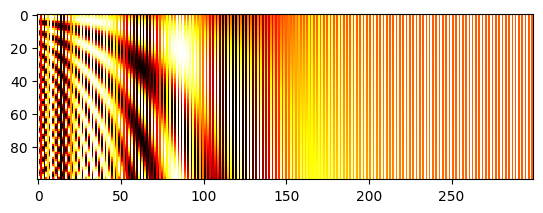

In [131]:
plt.imshow(get_positional_embeddings(100, 300), cmap="hot", interpolation="nearest")
plt.show()

In [140]:
class MyViT(nn.Module):
  def __init__(self,chw,n_patches = 8,hidden_units = 10):
    super().__init__()
    self.n_patches = n_patches
    self.chw = chw
    self.hidden_units = hidden_units
    assert self.chw[1] % self.n_patches == 0,"Input Shape not entirely divisble by patch_size"
    assert self.chw[2] % self.n_patches == 0,"Input Shape not entirely divisble by patch_size"
    self.number_of_patches = (self.chw[1]//self.n_patches)**2
    self.patch_size = (chw[1]/self.n_patches,chw[2]/self.n_patches)

    self.input_dimensions = int(chw[0]*self.patch_size[0]*self.patch_size[1])
    self.linear_mapper = nn.Linear(self.input_dimensions,self.hidden_units)
    self.class_token = nn.Parameter(torch.rand(1,self.hidden_units))

    self.position_embeddings = nn.Parameter(torch.tensor(get_positional_embeddings(self.n_patches**2+1,self.hidden_units)))
    self.position_embeddings.required_grad = False
  def patchify(self,images, n_patches):
    n, c, h, w = images.shape

    assert h == w, "Patchify method is implemented for square images only"

    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)
    patch_size = h // n_patches

    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                patches[idx, i * n_patches + j] = patch.flatten()
    return patches



    print(result)
  def forward(self,images):
    patches = self.patchify(images,self.n_patches)
    # print(patches.shape)
    tokens = self.linear_mapper(patches)
    # print(tokens.shape)
    tokens = torch.stack([torch.vstack((self.class_token,tokens[i])) for i in range(len(tokens))])
    pos_emb = self.position_embeddings.repeat(images.shape[0],1,1)
    out = tokens+pos_emb
    return out


In [141]:
model = MyViT([3,224,224],32)
sample_image_tensor = torch.randn([32,3,224,224])
# print(sample_image_tensor)
model(sample_image_tensor).shape

<ipython-input-140-3995618a2185>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.position_embeddings = nn.Parameter(torch.tensor(get_positional_embeddings(self.n_patches**2+1,self.hidden_units)))


torch.Size([32, 1025, 10])